In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df=pd.DataFrame(pd.read_csv('/kaggle/input/tips-csv/tip.csv'))
df.head(15)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [3]:
days=pd.get_dummies(df['day'])
df=pd.concat([df,days],axis=1)
df

,total_bill,tip,sex,smoker,day,time,size,Fri,Sat,Sun,Thur
0,16.99,1.01,Female,No,Sun,Dinner,2,False,False,True,False
1,10.34,1.66,Male,No,Sun,Dinner,3,False,False,True,False
2,21.01,3.50,Male,No,Sun,Dinner,3,False,False,True,False
3,23.68,3.31,Male,No,Sun,Dinner,2,False,False,True,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,False,True,False,False
240,27.18,2.00,Female,Yes,Sat,Dinner,2,False,True,False,False
241,22.67,2.00,Male,Yes,Sat,Dinner,2,False,True,False,False
242,17.82,1.75,Male,No,Sat,Dinner,2,False,True,False,False


In [4]:
times=pd.get_dummies(df['time'])
df=pd.concat([df,times],axis=1)
df

,total_bill,tip,sex,smoker,day,time,size,Fri,Sat,Sun,Thur,Dinner,Lunch
0,16.99,1.01,Female,No,Sun,Dinner,2,False,False,True,False,True,False
1,10.34,1.66,Male,No,Sun,Dinner,3,False,False,True,False,True,False
2,21.01,3.50,Male,No,Sun,Dinner,3,False,False,True,False,True,False
3,23.68,3.31,Male,No,Sun,Dinner,2,False,False,True,False,True,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,False,True,False,False,True,False
240,27.18,2.00,Female,Yes,Sat,Dinner,2,False,True,False,False,True,False
241,22.67,2.00,Male,Yes,Sat,Dinner,2,False,True,False,False,True,False
242,17.82,1.75,Male,No,Sat,Dinner,2,False,True,False,False,True,False


In [5]:
sex=pd.get_dummies(df['sex'])
df=pd.concat([df,sex],axis=1)
df

,total_bill,tip,sex,smoker,day,time,size,Fri,Sat,Sun,Thur,Dinner,Lunch,Female,Male
0,16.99,1.01,Female,No,Sun,Dinner,2,False,False,True,False,True,False,True,False
1,10.34,1.66,Male,No,Sun,Dinner,3,False,False,True,False,True,False,False,True
2,21.01,3.50,Male,No,Sun,Dinner,3,False,False,True,False,True,False,False,True
3,23.68,3.31,Male,No,Sun,Dinner,2,False,False,True,False,True,False,False,True
4,24.59,3.61,Female,No,Sun,Dinner,4,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,False,True,False,False,True,False,False,True
240,27.18,2.00,Female,Yes,Sat,Dinner,2,False,True,False,False,True,False,True,False
241,22.67,2.00,Male,Yes,Sat,Dinner,2,False,True,False,False,True,False,False,True
242,17.82,1.75,Male,No,Sat,Dinner,2,False,True,False,False,True,False,False,True


In [6]:
smoker=pd.get_dummies(df['smoker'])
df=pd.concat([df,smoker],axis=1)
df

,total_bill,tip,sex,smoker,day,time,size,Fri,Sat,Sun,Thur,Dinner,Lunch,Female,Male,No,Yes
0,16.99,1.01,Female,No,Sun,Dinner,2,False,False,True,False,True,False,True,False,True,False
1,10.34,1.66,Male,No,Sun,Dinner,3,False,False,True,False,True,False,False,True,True,False
2,21.01,3.50,Male,No,Sun,Dinner,3,False,False,True,False,True,False,False,True,True,False
3,23.68,3.31,Male,No,Sun,Dinner,2,False,False,True,False,True,False,False,True,True,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,False,True,False,False,True,False,False,True,True,False
240,27.18,2.00,Female,Yes,Sat,Dinner,2,False,True,False,False,True,False,True,False,False,True
241,22.67,2.00,Male,Yes,Sat,Dinner,2,False,True,False,False,True,False,False,True,False,True
242,17.82,1.75,Male,No,Sat,Dinner,2,False,True,False,False,True,False,False,True,True,False


In [7]:
# df.drop('smoker',inplace=True,axis=1)
df.drop('sex',inplace=True,axis=1)
df.drop('day',inplace=True,axis=1)
df.drop('time',inplace=True,axis=1)
df

,total_bill,tip,smoker,size,Fri,Sat,Sun,Thur,Dinner,Lunch,Female,Male,No,Yes
0,16.99,1.01,No,2,False,False,True,False,True,False,True,False,True,False
1,10.34,1.66,No,3,False,False,True,False,True,False,False,True,True,False
2,21.01,3.50,No,3,False,False,True,False,True,False,False,True,True,False
3,23.68,3.31,No,2,False,False,True,False,True,False,False,True,True,False
4,24.59,3.61,No,4,False,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,No,3,False,True,False,False,True,False,False,True,True,False
240,27.18,2.00,Yes,2,False,True,False,False,True,False,True,False,False,True
241,22.67,2.00,Yes,2,False,True,False,False,True,False,False,True,False,True
242,17.82,1.75,No,2,False,True,False,False,True,False,False,True,True,False


In [8]:
df.rename(columns={'No': 'No_smoker', 'Yes': 'Yes_smoker'}, inplace=True)
df

,total_bill,tip,smoker,size,Fri,Sat,Sun,Thur,Dinner,Lunch,Female,Male,No_smoker,Yes_smoker
0,16.99,1.01,No,2,False,False,True,False,True,False,True,False,True,False
1,10.34,1.66,No,3,False,False,True,False,True,False,False,True,True,False
2,21.01,3.50,No,3,False,False,True,False,True,False,False,True,True,False
3,23.68,3.31,No,2,False,False,True,False,True,False,False,True,True,False
4,24.59,3.61,No,4,False,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,No,3,False,True,False,False,True,False,False,True,True,False
240,27.18,2.00,Yes,2,False,True,False,False,True,False,True,False,False,True
241,22.67,2.00,Yes,2,False,True,False,False,True,False,False,True,False,True
242,17.82,1.75,No,2,False,True,False,False,True,False,False,True,True,False


In [9]:
df_reordered = df[['Fri','Sat','Sun','Thur','Dinner','Lunch','Female','Male','No_smoker','Yes_smoker','size', 'total_bill', 'tip']]

In [10]:
corr=df_reordered.corr()
corr.shape

(13, 13)

<Axes: >

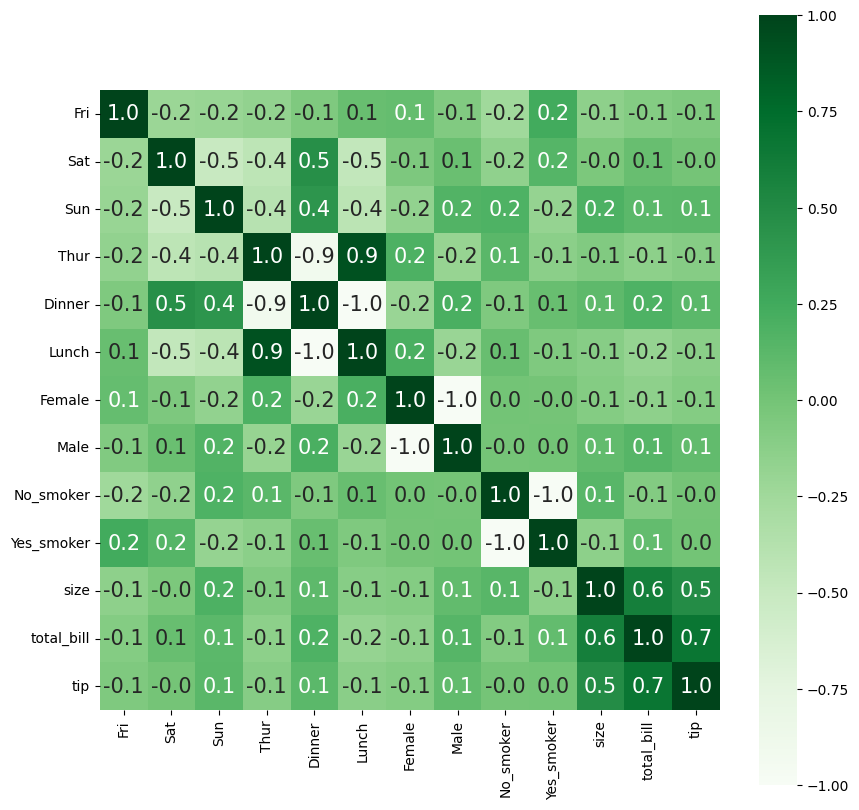

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':15}, cmap='Greens')

In [12]:
X=df_reordered[['tip']]
y=df_reordered['total_bill']

In [13]:
X_train,x_test,Y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)


In [14]:
slr=LinearRegression()
slr.fit(X_train,Y_train)

LinearRegression()

In [15]:
slr.intercept_

7.066607860638788

In [16]:
slr.coef_

array([4.25708858])

In [17]:
y_pred=slr.predict(X_train)

In [18]:
print('R^2: ',metrics.r2_score(Y_train,y_pred))
print('MAE: ', metrics.mean_absolute_error(Y_train,y_pred))
print('MSE: ',metrics.mean_squared_error(Y_train,y_pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(Y_train,y_pred)))

R^2:  0.4590489802376583
MAE:  4.779606137127847
MSE:  45.91002950253137
RMSE : 6.77569402367989


Text(0.5, 1.0, 'Tips vs Predicted tip')

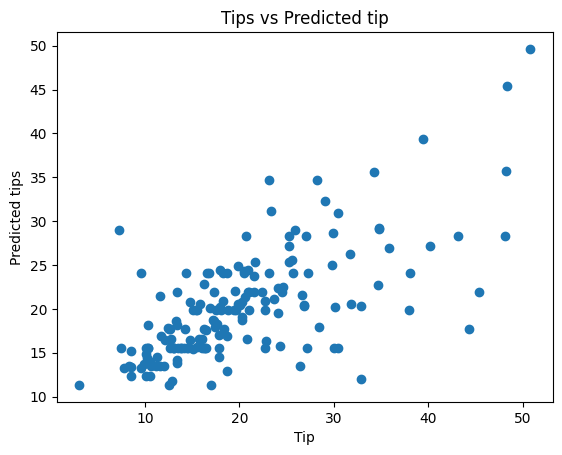

In [19]:
plt.scatter(Y_train,y_pred)
plt.xlabel("Tip")
plt.ylabel("Predicted tips")
plt.title("Tips vs Predicted tip")

# Multiple linear Regression (MLR)

In [20]:
Z= df_reordered.drop(['tip'], axis =1)
w = df_reordered['tip']

In [21]:
Z_train,Z_test,w_train,w_test = train_test_split(Z,w,test_size=0.3,random_state=4)

In [22]:
mlr = LinearRegression()
mlr.fit(Z_train,w_train)

LinearRegression()

In [23]:
mlr.intercept_

0.6242097965520332

In [24]:
mlr.coef_

array([ 0.02593726, -0.01467417,  0.0877208 , -0.09898389, -0.02200296,
        0.02200296, -0.045347  ,  0.045347  ,  0.00955074, -0.00955074,
        0.23484875,  0.09170037])

In [25]:
coeffcients = pd.DataFrame([Z_train.columns, mlr.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficents'})
print(coeffcients)

     Attribute Coefficents
0          Fri    0.025937
1          Sat   -0.014674
2          Sun    0.087721
3         Thur   -0.098984
4       Dinner   -0.022003
5        Lunch    0.022003
6       Female   -0.045347
7         Male    0.045347
8    No_smoker    0.009551
9   Yes_smoker   -0.009551
10        size    0.234849
11  total_bill      0.0917


In [26]:
w_pred=mlr.predict(Z_train)

In [27]:
print('R^2: ',metrics.r2_score(w_train,w_pred))
print('MAE: ', metrics.mean_absolute_error(w_train,w_pred))
print('MSE: ',metrics.mean_squared_error(w_train,w_pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(w_train,w_pred)))

R^2:  0.47824527691115215
MAE:  0.7681889454126827
MSE:  1.1216301397756738
RMSE : 1.0590704130395079


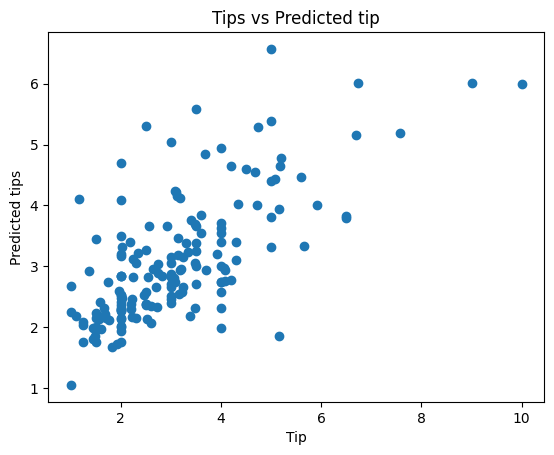

In [28]:
plt.scatter(w_train,w_pred)
plt.xlabel("Tip")
plt.ylabel("Predicted tips")
plt.title("Tips vs Predicted tip")
plt.show()

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
poly_features=PolynomialFeatures(degree=2)
Z_train_quadratic = poly_features.fit_transform(Z_train)
quadratic = LinearRegression()
quadratic.fit(Z_train_quadratic , w_train)
w_train_predicted = quadratic.predict(Z_train_quadratic)
w_test_predicted = quadratic.predict(poly_features.fit_transform(Z_test))

In [31]:
metrics.r2_score(w_test,w_test_predicted)

0.349468348354975